In [26]:
import numpy as np
import pandas as pd

In [27]:
# Read train and test data with pd.read_csv():
dataset = pd.read_csv('C:/Users/Kiran Kumar/Documents/GitHub/Bank Customer Churn/Churn_Modelling.csv')


In [28]:
### Removing Columns not needed for the model
dataset.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography'], axis=1, inplace=True)

In [29]:
#Turning Gender into numeric records
dataset.Gender = [1 if each == 'Male' else 0 for each in dataset.Gender]

In [30]:
x= dataset.iloc[:, 0:9]
y= dataset.iloc[: ,9]

In [31]:
### Splitting the data into test and train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2 , random_state =0)

In [32]:
x_test

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9394,597,0,35,8,131101.04,1,1,1,192852.67
898,523,0,40,2,102967.41,1,1,0,128702.10
2398,706,0,42,8,95386.82,1,1,1,75732.25
5906,788,1,32,4,112079.58,1,0,0,89368.59
2343,706,1,38,5,163034.82,2,1,1,135662.17
...,...,...,...,...,...,...,...,...,...
1037,625,0,24,1,0.00,2,1,1,180969.55
2899,586,0,35,7,0.00,2,1,0,70760.69
9549,578,1,36,1,157267.95,2,1,0,141533.19
2740,650,1,34,4,142393.11,1,1,1,11276.48


In [33]:
#1. import the class/model
from sklearn.ensemble import RandomForestClassifier
#2. Instantiate the estimator
model = RandomForestClassifier(random_state = 1, n_jobs = -1) 
#3. Fit the model with data aka model training
model.fit(x_train, y_train)

#4. Predict the response for a new observation
y_pred = model.predict(x_test)




In [12]:
# Confusion matrix for visualization our prediction accuracy:
from sklearn.metrics import confusion_matrix

# Creating the confusion matrix:
rf_cm = confusion_matrix(y_test, y_pred)



Text(0.5, 0, 'Relative Importance')

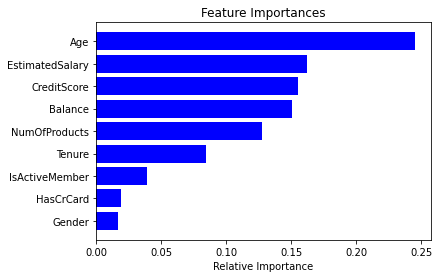

In [38]:
import matplotlib.pyplot as plt
features=dataset.columns[[0,1,2,3,4,5,6,7,8]]
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [40]:
pd.DataFrame({"IMP": importances, "features":features }).to_csv('variable_imp.csv',index=False)

In [49]:
print(rf_cm)

[[1526   69]
 [ 215  190]]


In [13]:
score_rf = model.score(x_test, y_test)
print(score_rf)

0.858


In [52]:
###Exporting the Model

import pickle
pickle_out = open("Churn_Model_RF_New.pkl","wb")
pickle.dump(model,pickle_out )
pickle_out.close()